In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('train_data.csv')



df.replace({'France':0,'Spain':1,'Germany':2},inplace=True)

df.replace({'Male':0,'Female':1},inplace=True)


/var/folders/xn/0m600knj04b2h51mvrp2hl380000gn/T/ipykernel_56707/2085204974.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'France':0,'Spain':1,'Germany':2},inplace=True)
/var/folders/xn/0m600knj04b2h51mvrp2hl380000gn/T/ipykernel_56707/2085204974.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Male':0,'Female':1},inplace=True)


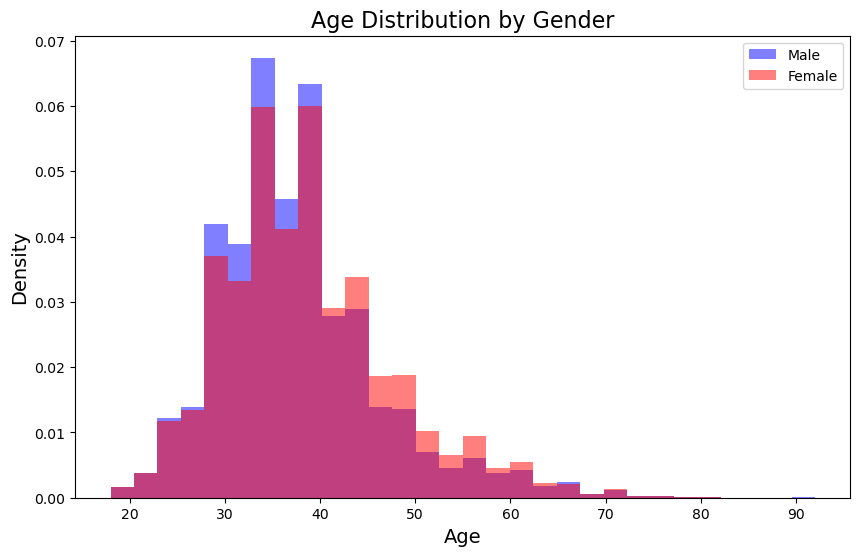

In [3]:
male_ages = df[df['Gender'] == 0 ]['Age']
female_ages = df[df['Gender'] == 1 ]['Age']

# Plot histograms
plt.figure(figsize=(10, 6))

# Male distribution
plt.hist(male_ages, bins=30, alpha=0.5, density=True, label='Male', color='blue')

# Female distribution
plt.hist(female_ages, bins=30, alpha=0.5, density=True, label='Female', color='red')

# Add labels, title, and legend
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

# Show plot
plt.show()

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

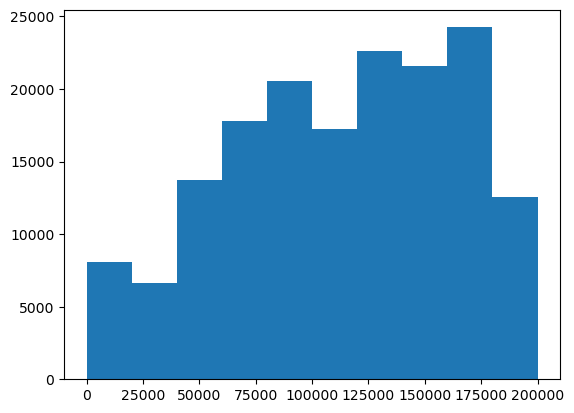

In [5]:
plt.hist(df['EstimatedSalary'])
plt.show();

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  int64  
 5   Gender           165034 non-null  int64  
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 17.6+ MB


In [7]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,0,0,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,0,0,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,0,0,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,1,0,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [9]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

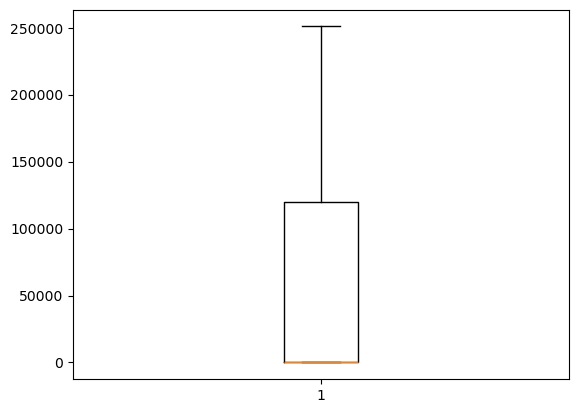

In [13]:
plt.boxplot(df['Balance'])
plt.show()

In [8]:
def Normalize(X):
    X_norm = (X-X.min())/(X.max()-X.min())

    return X_norm

In [14]:
X= df[['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]
x_norm = Normalize(X)

In [15]:
x_norm.head()

,CreditScore,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
0,0.636,0.202703,0.000000,0.3,0.333333,0.907279
1,0.554,0.202703,0.000000,0.1,0.333333,0.247483
2,0.656,0.297297,0.000000,1.0,0.333333,0.924364
3,0.462,0.216216,0.593398,0.2,0.000000,0.422787
4,0.732,0.202703,0.000000,0.5,0.333333,0.075293


In [20]:
X = pd.concat([x_norm,df[['Geography','Gender','HasCrCard','IsActiveMember']]],axis=1)

In [21]:
y = df[['Exited']]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  int64  
 5   Gender           165034 non-null  int64  
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 17.6+ MB


In [29]:
df.groupby(['CustomerId','Gender']).size().reset_index()

,CustomerId,Gender,0
0,15565701,0,2
1,15565701,1,1
2,15565706,0,4
3,15565714,0,2
4,15565714,1,1
...,...,...,...
34766,15815660,0,1
34767,15815660,1,3
34768,15815670,0,1
34769,15815690,0,6


In [30]:
df['row_number'] = df.groupby('CustomerId')['Age'].rank(method='first', ascending=False)
#print(df)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,row_number
0,0,15674932,Okwudilichukwu,668,0,0,33.0,3,0.00,2,1.0,0.0,181449.97,0,29.0
1,1,15749177,Okwudiliolisa,627,0,0,33.0,1,0.00,2,1.0,1.0,49503.50,0,13.0
2,2,15694510,Hsueh,678,0,0,40.0,10,0.00,2,1.0,0.0,184866.69,0,9.0
3,3,15741417,Kao,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,32.0
4,4,15766172,Chiemenam,716,1,0,33.0,5,0.00,2,1.0,1.0,15068.83,0,18.0


In [32]:
df1 = df[df['row_number']==1]

In [33]:
def Normalize(X):
    X_norm = (X-X.min())/(X.max()-X.min())

    return X_norm

In [34]:
X= df1[['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]
x_norm = Normalize(X)

In [35]:
x_norm.head()

,CreditScore,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
9,0.466,0.297297,0.340934,0.4,0.0,0.854239
12,0.818,0.716216,0.000000,0.9,0.0,0.465396
13,0.662,0.391892,0.000000,0.5,0.0,0.364705
18,0.590,0.500000,0.503824,0.8,0.0,0.625418
19,0.418,0.581081,0.644796,0.1,0.0,0.904480


In [36]:
X = pd.concat([x_norm,df1[['Geography','Gender','HasCrCard','IsActiveMember']]],axis=1)

In [37]:
y = df1[['Exited']]

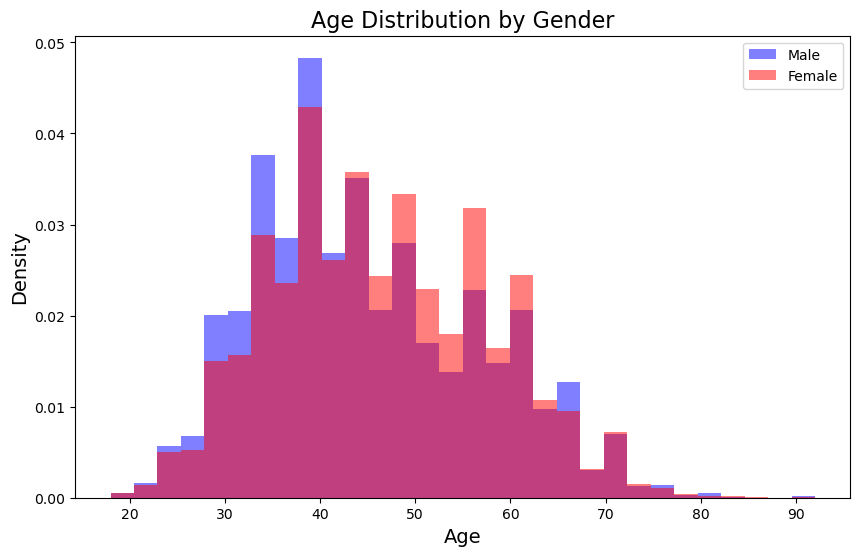

In [38]:
male_ages = df1[df1['Gender'] == 0 ]['Age']
female_ages = df1[df1['Gender'] == 1 ]['Age']

# Plot histograms
plt.figure(figsize=(10, 6))

# Male distribution
plt.hist(male_ages, bins=30, alpha=0.5, density=True, label='Male', color='blue')

# Female distribution
plt.hist(female_ages, bins=30, alpha=0.5, density=True, label='Female', color='red')

# Add labels, title, and legend
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

# Show plot
plt.show()

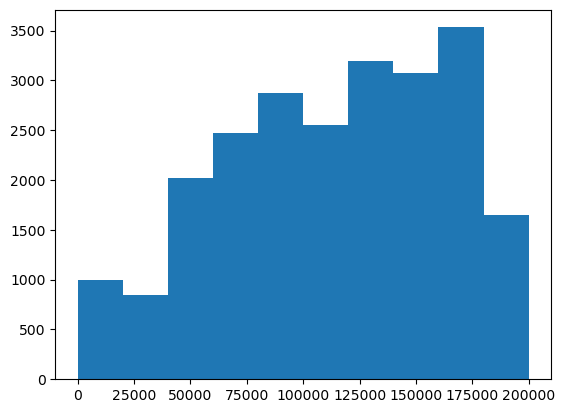

In [39]:
plt.hist(df1['EstimatedSalary'])
plt.show();

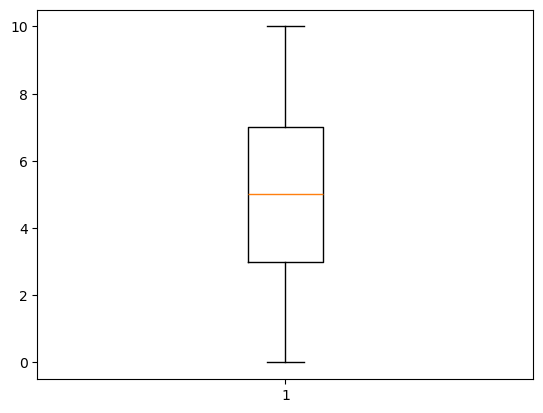

In [46]:
plt.boxplot(df1['Tenure'])
plt.show()

In [51]:
from sklearn.model_selection import train_test_split as tts

In [52]:
X_train, X_test, y_train, y_test = tts(X,y,random_state=1,test_size=0.2)

In [53]:
from sklearn.linear_model import LogisticRegression as lr

In [54]:
clf = lr(random_state=0).fit(X_train, y_train)
# from sklearn.metrics import precision_score; precision_score(y_true, y_pred)
# from sklearn.metrics import recall_score; recall_score(y_true, y_pred)
# from sklearn.metrics import accuracy_score; accuracy_score(y_true, y_pred)
# from sklearn.metrics import roc_auc_score; roc_auc_score(y_true, y_pred)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
y_pred = clf.predict(X_train)

In [57]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [65]:
precision_score(y_test, y_pred1)

0.7178841309823678

In [66]:
recall_score(y_test, y_pred1)

0.5494858611825193

In [67]:
accuracy_score(y_test, y_pred1)

0.7767491926803014

In [68]:
roc_auc_score(y_test, y_pred1)

0.7203563977327293

In [63]:
y_pred1 = clf.predict(X_test)

In [80]:
df2 = pd.read_csv('test_data.csv')

In [81]:
df2.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [82]:
df2.replace({'France':0,'Spain':1,'Germany':2},inplace=True)

df2.replace({'Male':0,'Female':1},inplace=True)


/var/folders/xn/0m600knj04b2h51mvrp2hl380000gn/T/ipykernel_56707/3519423889.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'France':0,'Spain':1,'Germany':2},inplace=True)
/var/folders/xn/0m600knj04b2h51mvrp2hl380000gn/T/ipykernel_56707/3519423889.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'Male':0,'Female':1},inplace=True)


In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  int64  
 5   Gender           110023 non-null  int64  
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 10.9+ MB


In [84]:
df2['CustomerId'].nunique()

19698

In [85]:
df2.drop_duplicates(inplace=True)

In [86]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  int64  
 5   Gender           110023 non-null  int64  
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 10.9+ MB


In [87]:
df2['row_number'] = df2.groupby('CustomerId')['Age'].rank(method='first', ascending=False)
#print(df)
df2.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,row_number
0,165034,15773898,Lucchese,586,0,1,23.0,2,0.00,2,0.0,1.0,160976.75,6.0
1,165035,15782418,Nott,683,0,1,46.0,2,0.00,1,1.0,0.0,72549.27,7.0
2,165036,15807120,K?,656,0,1,34.0,7,0.00,2,1.0,0.0,138882.09,7.0
3,165037,15808905,O'Donnell,681,0,0,36.0,8,0.00,1,1.0,0.0,113931.57,4.0
4,165038,15607314,Higgins,752,2,0,38.0,10,121263.62,1,1.0,0.0,139431.00,12.0


In [88]:
X= df2[['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]
x_norm = Normalize(X)

In [89]:
X = pd.concat([x_norm,df2[['Geography','Gender','HasCrCard','IsActiveMember']]],axis=1)

In [90]:
#y = df1[['Exited']]
y_pred = clf.predict(X)